# Introducción

## Pre-Procesamiento de datos

In [ ]:
import numpy as np 
import pandas as pd 
from datetime import datetime

In [ ]:
%pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 23.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=a8ac06c082ce81ce1370ffa804bfff440726483930f49518b066ab569d95ce4a
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
import folium 
from folium import plugins

In [ ]:
import numpy as np
from PIL import Image


import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5

In [ ]:
df = pd.read_csv('forbes_richest_atheletes__forbes_richest_athletes_1990-2020___3_.csv')
df.head()

S.NO               Name Nationality  Current Rank Previous Year Rank  \
0     1         Mike Tyson         USA             1                NaN   
1     2     Buster Douglas         USA             2                NaN   
2     3  Sugar Ray Leonard         USA             3                NaN   
3     4       Ayrton Senna      Brazil             4                NaN   
4     5        Alain Prost      France             5                NaN   

         Sport  Year  earnings ($ million)  
0       boxing  1990                  28.6  
1       boxing  1990                  26.0  
2       boxing  1990                  13.0  
3  auto racing  1990                  10.0  
4  auto racing  1990                   9.0

In [ ]:
df1 = df.copy()
df1.drop('S.NO',axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


In [ ]:
# Convert string to datetime64
df1['Year'] = df1['Year'].apply(pd.to_datetime,format='%Y')

#Set Date column as the index column.
df1['year'] = pd.DatetimeIndex(df1['Year']).year  
df1.set_index('year', inplace=True)
df1.drop('Year',axis=1,inplace=True)

# Converting the sport column to uppercase
df1['Sport'] = df1['Sport'].str.upper()
df1.head()

# df is the original dataframe while df1 is a copy where the Date has been set as an index column

Name Nationality  Current Rank Previous Year Rank  \
year                                                                   
1990         Mike Tyson         USA             1                NaN   
1990     Buster Douglas         USA             2                NaN   
1990  Sugar Ray Leonard         USA             3                NaN   
1990       Ayrton Senna      Brazil             4                NaN   
1990        Alain Prost      France             5                NaN   

            Sport  earnings ($ million)  
year                                     
1990       BOXING                  28.6  
1990       BOXING                  26.0  
1990       BOXING                  13.0  
1990  AUTO RACING                  10.0  
1990  AUTO RACING                   9.0

## Los atletas mejor pagados en 2020

In [ ]:
data_2020 = df1[df1.index == 2020]

trace = go.Bar(
                    x = data_2020["earnings ($ million)"],
                    y = data_2020['Name'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title="World's Highest-Paid Athletes in 2020",width=800, height=500, 
                       #xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)


### Análisis de los atletas mejor pagados entre 1990 y 2020

In [ ]:
# Top Paid Athlete for Each Year
Top_paid_each_year = df1[df1['Current Rank'] == 1].sort_values(by='year',ascending=False)

z = Top_paid_each_year[['Name','Sport','Nationality','earnings ($ million)']]

z.style.background_gradient(cmap='Reds')  

In [ ]:
Top_paid_each_year = df1[df1['Current Rank'] == 1].sort_values(by='year',ascending=False)

z = Top_paid_each_year[['Name','Sport','Nationality','earnings ($ million)']]

z.style.background_gradient(cmap='Reds')  

#### Atletas con mayor ingreso y máximo número de apreiciones en la lista Forbes

In [ ]:
counts_top = Top_paid_each_year['Name'].value_counts().to_frame()


trace = go.Bar(
                    y = counts_top.index,
                    x = counts_top['Name'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Athlete earning the most,maximum number of times',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)


In [ ]:
# Top Paid Athlete for Each Year
total_earnings = Top_paid_each_year.groupby('Name')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks = Top_paid_each_year['Name'].value_counts().to_frame().reset_index()
top_ranks.rename(columns={'index':'Name',
                          'Name':'Rank_counts'}, inplace=True)
df_compare = total_earnings.merge(top_ranks, on='Name')

In [ ]:
#source: https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners#Bar-Charts

import plotly.graph_objs as go
from plotly import tools
trace0 = go.Bar(
                y=df_compare['Name'],
                x=df_compare['Rank_counts'],
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='Top Ranks',
                orientation='h',
)

trace1 = go.Scatter(
                y=df_compare['Name'],
                x=df_compare['earnings ($ million)'],
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)

layout = dict(
                title='Income and Top Ranks',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=False,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []
y_s = df_compare['Rank_counts']
y_nw = np.rint(df_compare['earnings ($ million)'])
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, df_compare['Name']):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn-1,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd+1,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations


# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
fig.show()


/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### País que produce los máximos generadores de ingreso en deporte

In [ ]:
counts_top = Top_paid_each_year['Nationality'].value_counts().to_frame()


trace = go.Bar(
                    x = counts_top.index,
                    y = counts_top['Nationality'] ,
                    orientation='v',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which produces the maximum earners in Sports',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       #yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

#### ¿Cuánto ingresan los mejores atletas cada año?

In [ ]:
trace = go.Scatter(
                    x = Top_paid_each_year.index,
                    y = Top_paid_each_year['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='royalblue',width=2)),
                    )
data = [trace]
layout = go.Layout(title='How much did the Top Paid Athlete for Each Year, earn? ',width=800, height=500, 
                       xaxis= dict(title='Years'),
                       yaxis=dict(title="Earning in US Dollars(million)"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Análisis de los 10 atletas mejores pagados cada año entre 1990 y 2020

### ¿Cuánto ingresan los mejores atletas cada año?

In [ ]:
df['Sport'] = df['Sport'].str.upper() # Converting the text to uppercase
max_sport = df['Sport'].value_counts().to_frame()

trace = go.Bar(
                    y = max_sport.index,
                    x = max_sport['Sport'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Sport which dominates in earnings',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

### País que más ingresos tiene en deportes

In [ ]:
max_sport = df['Nationality'].value_counts().to_frame()


trace = go.Bar(
                    y = max_sport.index,
                    x = max_sport['Nationality'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which dominates in Sports earningss',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

### Atletas que aparecen más frecuentemente en la lista

In [ ]:
s = df['Name'].value_counts().to_frame()[:5]
s.style.background_gradient(cmap='Reds')  

## ¿Dónde se encuentran las mujeres?

In [ ]:
# People who have appeared once on the list.
names = df['Name'].value_counts().to_frame()
names[names['Name']==1].index

# On scanning the list, we find the name of a sole women athlete- monica seles
monica = df[df['Name'] == 'Monica Seles']
monica.style.set_properties(**{'background-color': 'pink',
                            'color': 'black',
                            'border-color': 'black'})

## Analizando a los 3 mejores pagados de todos los tiempos

In [ ]:
top_earners_alltime = pd.pivot_table(df, index='Name',values="earnings ($ million)", aggfunc='sum')
top3_earners_all = top_earners_alltime.sort_values(by="earnings ($ million)",ascending=False)[:3]

top3_earners_all.style.background_gradient(cmap='Reds')  

### Analizando los ingresos de Tiger Woods a lo largo de los años

In [ ]:
def earnings_plot(dataframe,athlete,image_path,opacity):
    """
    function that creates a plotly line chart with image of the athlete in the background
    
    
    """
    athlete_df = df1[df1['Name'] == athlete]

    trace = go.Scatter(
                    x = athlete_df.index,
                    y = athlete_df['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='red',width=6)),
                    )
    data = [trace]
    layout= go.Layout(title= f'{athlete}' +"'s earnings over the Years",
                  xaxis=dict(title='Year'),
                  yaxis=dict(title="Earnings in US$ (millions)"),
                  images= [dict(
                          source=Image.open(image_path),
                          xref= "paper",
                          yref= "paper",
                          x= 0.5,
                          y= 0.5,
                          sizex= 1,
                          sizey= 1,
                          sizing= "stretch",
                          opacity= opacity,
                          xanchor= "center", 
                          yanchor="middle",
                          layer= "below")])
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)


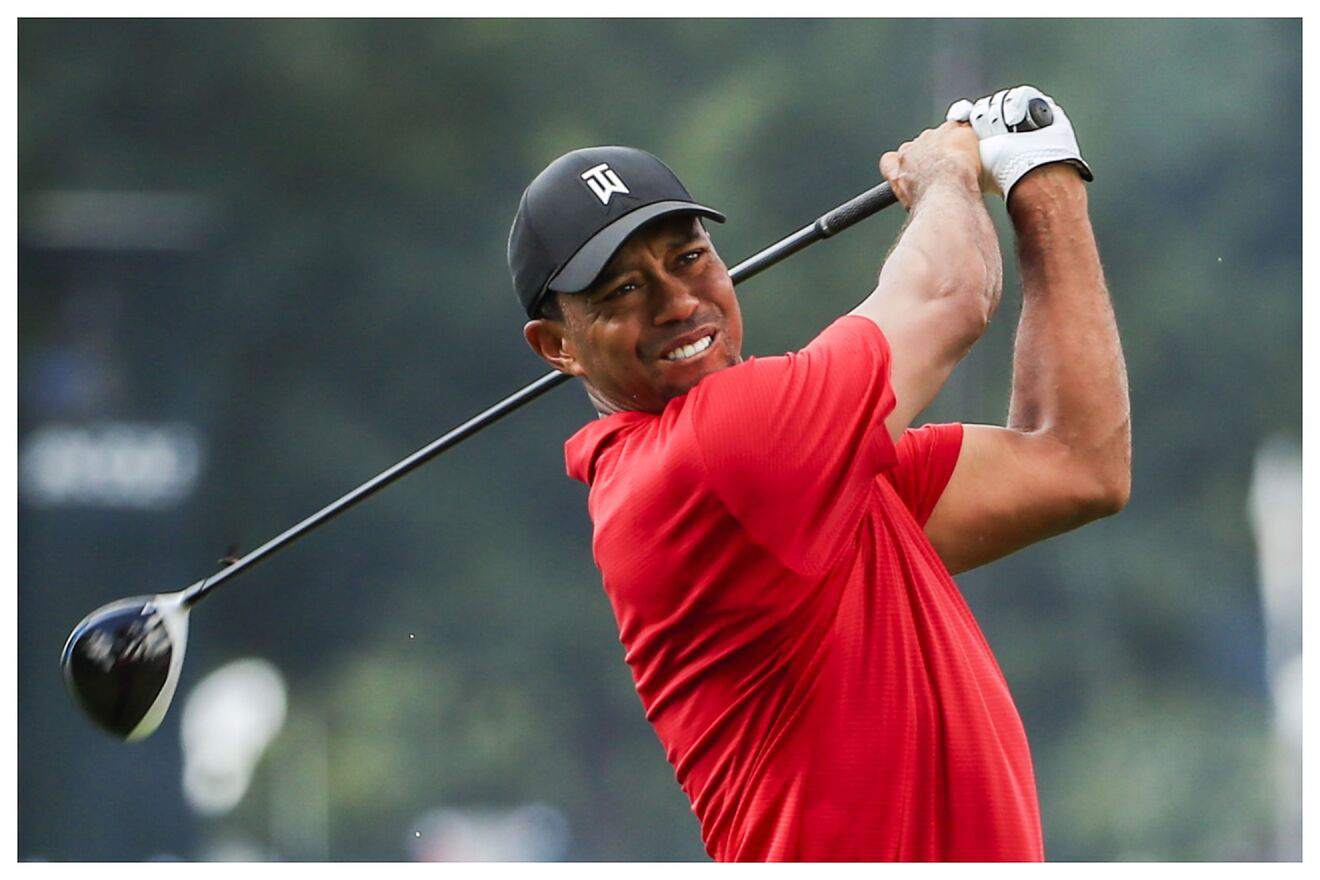

In [ ]:
image_path = "tiger_woods.jpg"
earnings_plot(df1,'Tiger Woods',image_path,opacity=0.3)


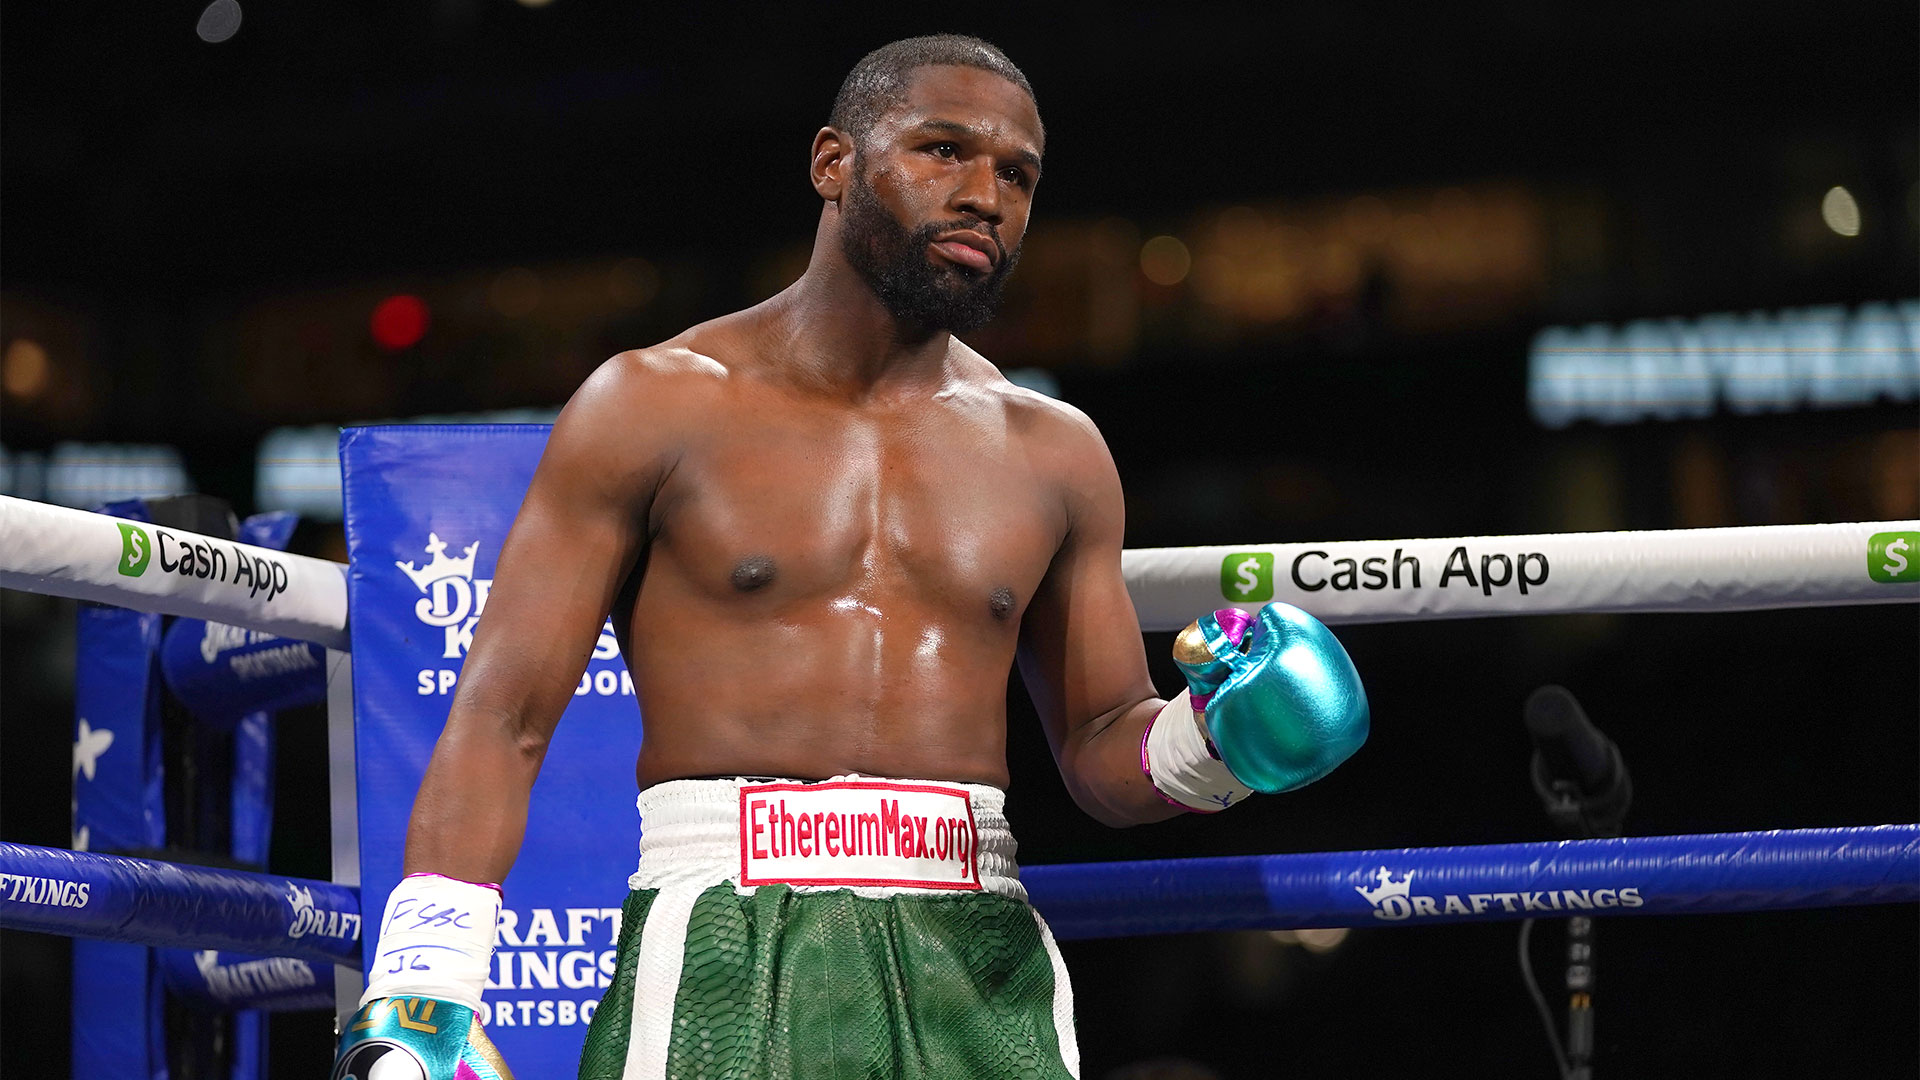

In [ ]:
image_path = "Floyd.jpg"
earnings_plot(df1,'Floyd Mayweather',image_path,opacity=0.2)


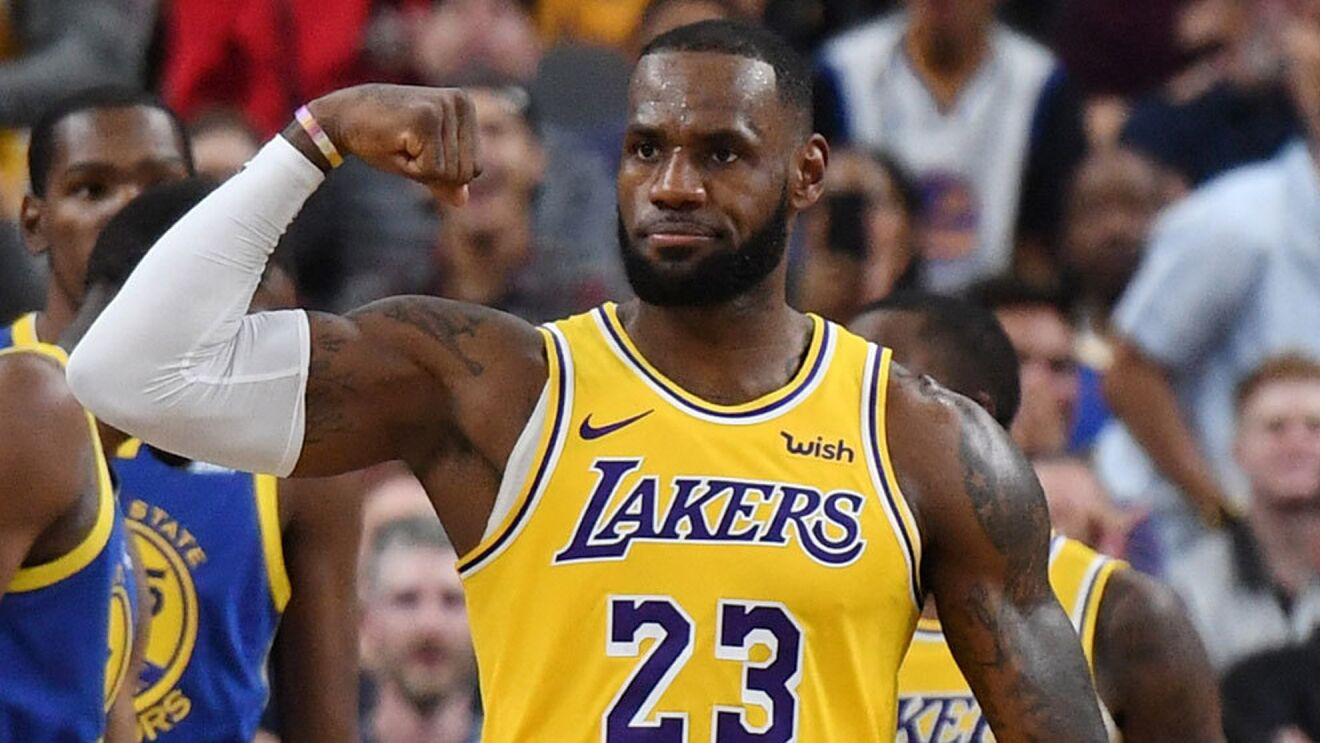

In [ ]:
image_path = "LeBron.jpg"
earnings_plot(df1,'LeBron James',image_path,opacity=0.2)

# Momento de Brillar

## 1. Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/forbes_richest_atheletes__forbes_richest_athletes_1990-2020___3_.csv')

In [ ]:
df['Year'].value_counts().sort_index()

1990    10
1991    10
1992    10
1993    10
1994    10
1995    10
1996    10
1997    10
1998    10
1999    10
2000    10
2002    11
2003    10
2004    10
2005    10
2006    10
2007    10
2008    10
2009    10
2010    10
2011    10
2012    10
2013    10
2014    10
2015    10
2016    10
2017    10
2018    10
2019    10
2020    10
Name: Year, dtype: int64

In [ ]:
df_2 = df[(df['Year'] >= 2010)]
#df = df[(df['Year'] >= 2010)]

In [ ]:
pivot_years = pd.pivot_table(df_2, index = 'Name', columns= 'Year', values = 'Current Rank', aggfunc= 'first')

In [ ]:
pivot_years[(pivot_years[2010] - 2 >= pivot_years[2020])]

Year           2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
Name                                                                        
LeBron James    7.0   3.0   4.0   4.0   3.0   6.0   3.0   2.0   6.0   8.0   
Roger Federer   6.0   4.0   5.0   2.0   7.0   5.0   4.0   4.0   7.0   5.0   

Year           2020  
Name                 
LeBron James    5.0  
Roger Federer   1.0

## 2. Atleta con el menor número de apariciones y mayores ganancias.

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import plotly.graph_objs as go


#Leemos nuestro DataSet y creamos una copia para hacer modificaciones
df= pd.read_csv("forbes_richest_atheletes__forbes_richest_athletes_1990-2020___3_.csv")
df1= df.copy()
df1.drop('S.NO',axis=1, inplace=True)

#Convertimos la columna de deporte a mayusculas
df1['Sport'] = df1['Sport'].str.upper()
df1 = df1.fillna(0)

#Convertimos las columnas de nombre y nacionalidad a un diccionario
names = df1["Name"].values.tolist()
countnames = {}
#Hacemos el conteo de deportistas por nacionalidad
for name in names:
    countnames[name] = countnames.get(name, 0) + 1

#Convertimos nuestro diccionario resultante a un DataFrame con las caracteristicas necesarias
number_of_appearances = pd.DataFrame.from_dict(countnames,orient = "index", columns = ['Number of Appearances'])

#Atleta con el menor numero de apariciones y mayores ganancias 

earnings_total = pd.pivot_table(df, index='Name',values="earnings ($ million)", aggfunc='sum')
earnings_total['Number of Appearances'] = number_of_appearances['Number of Appearances']
earnings_appearances = earnings_total
earnings_appearances['Rate of'] = earnings_appearances["earnings ($ million)"]/earnings_appearances['Number of Appearances']
earnings_appearances = earnings_appearances.sort_values(by='Rate of',ascending=False)
earnings_appearances.reset_index()


earnings_appearances.style.background_gradient(cmap='Reds') 


In [ ]:
#Graficamos
earnings_appearances_top10 = earnings_appearances.sort_values(by='Rate of',ascending=False)[:10]
trace = go.Bar(
                    y = earnings_appearances_top10.index,
                    x = earnings_appearances_top10['Rate of'],
                    orientation='h',
                    marker = dict(color='orange',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Athletes with the minor number of appareances and the biggest profit (TOP 10)',width=800, height=500, 
                       xaxis= dict(title='Earnings divided by number of appareances'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## 3. Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.

In [ ]:
# Reemplazar campos vacíos por 'not ranked'
df3 = df1
df3['Previous Year Rank'] = df3['Previous Year Rank'].replace(['none','??',None],'not ranked')
df3

Name Nationality  Current Rank Previous Year Rank  \
0           Mike Tyson         USA             1                  0   
1       Buster Douglas         USA             2                  0   
2    Sugar Ray Leonard         USA             3                  0   
3         Ayrton Senna      Brazil             4                  0   
4          Alain Prost      France             5                  0   
..                 ...         ...           ...                ...   
296      Stephen Curry         USA             6                  9   
297       Kevin Durant         USA             7                 10   
298        Tiger Woods         USA             8                 11   
299       Kirk Cousins         USA             9               >100   
300       Carson Wentz         USA            10               >100   

                 Sport  Year  earnings ($ million)  
0               BOXING  1990                  28.6  
1               BOXING  1990                  26.0  
2               BOXING  1990                  13.0  
3          AUTO RACING  1990                  10.0  
4          AUTO RACING  1990                   9.0  
..                 ...   ...                   ...  
296         BASKETBALL  2020                  74.4  
297         BASKETBALL  2020                  63.9  
298               GOLF  2020                  62.3  
299  AMERICAN FOOTBALL  2020                  60.5  
300  AMERICAN FOOTBALL  2020                  59.1  

[301 rows x 7 columns]

In [ ]:
# Mostrar deporte con mayor número de altetas no rankeados
muestra_ej3 = df3[df3['Previous Year Rank'] == 'not ranked']
deporte_max_no_rank = muestra_ej3['Sport'].value_counts().to_frame()

trace = go.Bar(
                    x = deporte_max_no_rank['Sport'],
                    y = deporte_max_no_rank.index,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title="Deporte con mayor número de atletas no rankeados",width=800, height=500, 
                       #xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)







In [ ]:
# Mostrar país con mayor número de altetas no rankeados
pais_max_no_rank = muestra_ej3['Nationality'].value_counts().to_frame()

trace = go.Bar(
                    x = pais_max_no_rank['Nationality'],
                    y = pais_max_no_rank.index,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title="País con mayor número de atletas no rankeados",width=800, height=500, 
                       #xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)


## 4. País con mayor número de deportes con atletas en el dataset.

In [ ]:
#País con mayor número de deportes con atletas en el dataset.

In [ ]:
df[df.Nationality == 'Argentina']

S.NO          Name Nationality  Current Rank Previous Year Rank   Sport  \
210   211  Lionel Messi   Argentina            10                >20  soccer   
230   231  Lionel Messi   Argentina            10                 11  soccer   
234   235  Lionel Messi   Argentina             4                 10  soccer   
244   245  Lionel Messi   Argentina             4                  4  soccer   
252   253  Lionel Messi   Argentina             2                  4  soccer   
263   264  Lionel Messi   Argentina             3                  2  soccer   
272   273  Lionel Messi   Argentina             2                  3  soccer   
281   282  Lionel Messi   Argentina             1                  2  soccer   
293   294  Lionel Messi   Argentina             3                  1  soccer   

     Year  earnings ($ million)  
210  2011                  32.3  
230  2013                  41.3  
234  2014                  64.7  
244  2015                  73.8  
252  2016                  81.4  
263  2017                  80.0  
272  2018                 111.0  
281  2019                 127.0  
293  2020                 104.0

In [ ]:
df['Sport'] = df['Sport'].str.lower()

In [ ]:
df['Sport'] = df['Sport'].replace({
                          'auto racing (nascar)':'nascar',
                          'auto racing':'nascar'
                        })

In [ ]:
pais_deporte = df.groupby('Nationality').nunique()

In [ ]:
pais_deporte.sort_values('Sport')

S.NO  Name  Current Rank  Previous Year Rank  Sport  Year  \
Nationality                                                                   
Argentina            9     1             5                   7      1     9   
Switzerland         12     1             7                   6      1    12   
Spain                1     1             1                   1      1     1   
Serbia               1     1             1                   1      1     1   
Russia               1     1             1                   0      1     1   
Portugal            10     1             5                   6      1    10   
Philippines          3     1             3                   3      1     3   
Northern Ireland     1     1             1                   1      1     1   
Mexico               1     1             1                   1      1     1   
Italy                4     1             2                   2      1     4   
Ireland              1     1             1                   1      1     1   
France               3     1             3                   2      1     3   
Finland              3     1             3                   3      1     3   
Filipino             1     1             1                   1      1     1   
Dominican            1     1             1                   1      1     1   
Austria              1     1             1                   1      1     1   
Australia            1     1             1                   0      1     1   
Brazil               9     3             5                   6      2     9   
UK                  13     3             8                   8      2    13   
Germany             13     1             6                   6      3    13   
Canada               6     4             4                   6      4     6   
USA                206    56            10                  30     11    30   

                  earnings ($ million)  
Nationality                             
Argentina                            9  
Switzerland                         12  
Spain                                1  
Serbia                               1  
Russia                               1  
Portugal                            10  
Philippines                          3  
Northern Ireland                     1  
Mexico                               1  
Italy                                3  
Ireland                              1  
France                               3  
Finland                              3  
Filipino                             1  
Dominican                            1  
Austria                              1  
Australia                            1  
Brazil                               9  
UK                                  12  
Germany                             13  
Canada                               6  
USA                                156

In [ ]:
df[df['Nationality'] == 'USA'].Sport.value_counts()

basketball                      81
golf                            42
boxing                          40
american football               17
tennis                           9
nascar                           6
baseball                         5
nfl                              3
nba                              1
american football / baseball     1
cycling                          1
Name: Sport, dtype: int64

In [ ]:
df[df['Sport'] == 'american football / baseball']

S.NO           Name Nationality  Current Rank Previous Year Rank  \
52    53  Deion Sanders         USA             3                 38   

                           Sport  Year  earnings ($ million)  
52  american football / baseball  1995                  22.5

In [ ]:
df.Sport.value_counts()

basketball                      81
boxing                          46
golf                            44
soccer                          33
tennis                          23
nascar                          23
american football               17
f1 racing                        8
baseball                         6
f1 motorsports                   5
motorcycle gp                    4
nfl                              3
ice hockey                       3
cycling                          1
american football / baseball     1
hockey                           1
nba                              1
mma                              1
Name: Sport, dtype: int64

## 5. ¿Cuántos atletas por deporte tiene cada país?

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
 

#Leemos nuestro DataSet y creamos una copia para hacer modificaciones
df= pd.read_csv("forbes_richest_atheletes__forbes_richest_athletes_1990-2020___3_.csv")
df1= df.copy()
df1.drop('S.NO',axis=1, inplace=True)
#df1.info()

#Convertimos la columna de deporte a mayusculas
df1['Sport'] = df1['Sport'].str.upper()
df1 = df1.fillna(0)

#Convertimos las columnas de nombre y nacionalidad a un diccionario
athletes = df.set_index('Name').to_dict()['Nationality']
countnationality = {}
#Hacemos el conteo de deportistas por nacionalidad
for Nation in athletes.values():
    countnationality[Nation] = countnationality.get(Nation, 0) + 1

#Convertimos nuestro diccionario resultante a un DataFrame con las caracteristicas necesarias
athletes_per_country = pd.DataFrame.from_dict(countnationality,orient = "index", columns = ['Number of Athletes'])
athletes_per_country.reset_index()
athletes_per_country.style.background_gradient(cmap='Reds')

In [ ]:
athletes_per_country_Top10 = athletes_per_country.sort_values(by='Number of Athletes',ascending=False)[:10]

#Creamos nuestra grafica de barras
trace = go.Bar(
                    y = athletes_per_country_Top10.index,
                    x = athletes_per_country_Top10['Number of Athletes'],
                    orientation = 'h',
                    marker = dict(color='green',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Number of athletes of each country',width=800, height=500, 
                       xaxis= dict(title='Number of athletes'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## 6. Ganancia mínima y máxima (dentro del dataset) por deporte y por país.

In [ ]:
# Ganancia deporte
ganancia_deporte = df1.groupby(['Sport'])['earnings ($ million)'].agg(['max','min'])
ganancia_deporte.style.set_properties(**{'background-color': 'cyan',
                            'color': 'black',
                            'border-color': 'black'})

In [ ]:
ganancia_país = df1.groupby(['Nationality'])['earnings ($ million)'].agg(['max','min'])
ganancia_país.style.set_properties(**{'background-color': 'pink',
                            'color': 'black',
                            'border-color': 'black'})

## 7. Atleta con mayores ganancias por deporte por década

In [ ]:
#Leemos nuestro DataSet y creamos una copia para hacer modificaciones
import pandas as pd
import numpy as np
df = pd.read_csv("/content/forbes_richest_atheletes__forbes_richest_athletes_1990-2020___3_.csv")
df1 = df.copy()

In [ ]:
  #Analizamos que años se estan considerando
  df1.Year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
#Añadimos columan al DF que indique la decada
df1['Decade'] = np.where((df1.Year >= 1990) & (df1.Year <2000), "90's", np.nan)
df1['Decade'] = np.where((df1.Year >= 2000) & (df1.Year <2010), "00's", df1['Decade'] )
df1['Decade'] = np.where((df1.Year >= 2010) & (df1.Year <= 2020), "10's", df1['Decade'] )

In [ ]:
#Ordenamos por ganacia en orden descendente, Agrupamos el DF por decade y selecciones el ultimo registro
df1.sort_values('earnings ($ million)').groupby('Decade').last()[['Name','earnings ($ million)']]

Name  earnings ($ million)
Decade                                        
00's         Tiger Woods                 115.0
10's    Floyd Mayweather                 300.0
90's      Michael Jordan                  78.3

## 8. Ganancia total por cada deporte por cada año.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/forbes_richest_atheletes__forbes_richest_athletes_1990-2020___3_.csv')

In [ ]:
pivot_gain = pd.pivot_table(df, index = 'Sport')

In [ ]:
Highest_paid_sport_per_year1 = pd.pivot_table(df, index='Sport',values="earnings ($ million)", aggfunc='sum')


In [ ]:
Highest_paid_sport_per_year1

earnings ($ million)
Sport                                             
AMERICAN FOOTBALL                            901.2
AMERICAN FOOTBALL / BASEBALL                  22.5
AUTO RACING                                  386.3
AUTO RACING (NASCAR)                          44.5
BASEBALL                                     146.1
BASKETBALL                                  3418.1
BOXING                                      2298.8
CYCLING                                       28.0
F1 MOTORSPORTS                               248.0
F1 RACING                                    397.0
GOLF                                        2136.5
HOCKEY                                        17.9
ICE HOCKEY                                    57.8
MMA                                           99.0
MOTORCYCLE GP                                128.0
NASCAR                                        77.2
NBA                                           15.2
NFL                                           37.5
SOCCER                                      2223.5
TENNIS                                      1017.3